<a href="https://colab.research.google.com/github/amj31585/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# I learned from our class this week that there are differences between Bayesian and Frequentist statstical views. (# Ex: xkcd comic) The frequentist model tends to arrive at conclusions that are not changed. The Bayesian model tends to arrive at conclusions that can be changed by adding new information.  

In [0]:

p_infected = .005
p_pos_infected = 1
p_pos_not_infected = .01
p_not_infected = 1 - p_infected

numerator = p_pos_infected*p_infected

denominator = p_pos_infected*p_infected + p_pos_not_infected*p_not_infected

posterior_probability = numerator / denominator

print(posterior_probability)
def prob_drunk_given_pos(prior, true_positive, false_positive):
  numerator = true_positive*prior
  denominator = (true_positive*prior + false_positive*(1-prior))
  posterior = numerator / denominator
  return posterior
  
first_posterior = prob_drunk_given_pos(1/1000, 1, .08)
# # Prior Probability can change to reflect previously found values
# True Positive Rate
# False Positive Rate
# Complement Prior shows as a straight slash on equation examples


0.33444816053511706


In [0]:
second_posterior = prob_drunk_given_pos(first_posterior, 1, .08)
print(second_posterior)

0.13525210993291495


In [0]:
# How many postive brethalyzer tests are needed in order to have a probility that's greater than 95% that a person is drunk beynod the legal limit?
# 4 positive breathalyzer tests appmx 96% confidence level

In [0]:
import pandas as pd
import numpy as np
import scipy as stats
from scipy import stats
?pd.read_csv(scipy.stats.bayes_mvs)

In [0]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv", na_values=' ?')

print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df['age'].mean()

38.58164675532078

In [0]:
sample = df.sample(1000)

In [0]:
sample['age'].mean()

39.108

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
from scipy import stats
def confidence_interval(data, confidence=0.95):
  data=np.array(data)
mean = np.mean(data)
n = len(data)
s = data.std(ddof=1)
stderr = s / np.sqrt(n)
t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
margin_of_error = t*stderr
return (mean - margin_of_error, mean, mean + margin_of_error)

NameError: ignored

In [0]:
frequentist = confidence_interval(sample['age'])
frequentist

In [0]:
bayesian, _, _ = stats.bayes_mvs(sample['age'], alpha=.95)
bayesian

Mean(statistic=39.108, minmax=(38.25206230641991, 39.963937693580085))

TypeError: ignored

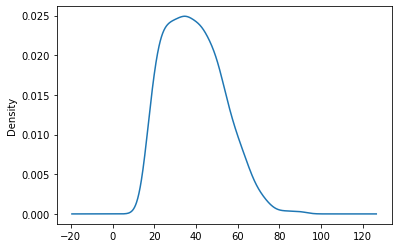

In [0]:
sample['age'].plot.density()
plt.axvline(frequentist[0], color='red')
plt.axvline(frequentist[1], color='blue')
plt.axvline(frequentist[2], color='red')
plt.show()

In [0]:
bayesian.statistic
bayesian.minmax[1]
bayesian.minmax[0]

bayesian.minmax[1] - bayesian.minmax[0]

1.7118753871601768

In [0]:
(frequentist[2]-frequentist[1])

TypeError: ignored

In [0]:
import matplotlib.pyplot as plt
plt.errorbar(x=0, y=frequentist[1], yerr=(frequentist[2]-frequentist[1]), fmt='o')
plt.errorbar(x=1, y=bayesian.statistic, yerr=(bayesian.minmax[1]-bayesian.statistic), fmt='o')
plt.show()

TypeError: ignored

In [0]:
# TODO - code! #

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!